# **LAB 11 : Dimensionality Reduction**

  1. Principal Component Analysis (PCA)
  2. Linear Discriminant Analysis (LDA)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<hr>

## Task 1: PCA

### 1.1 Data Generation

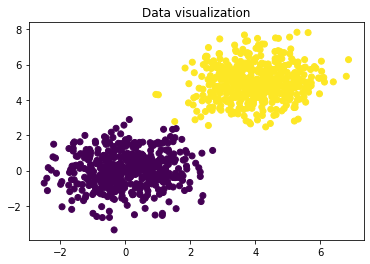

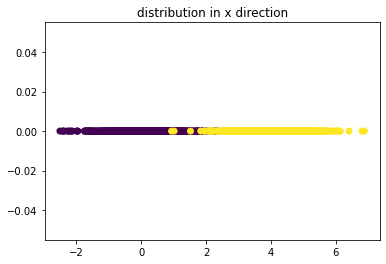

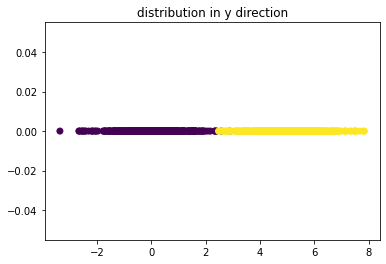

In [2]:
mean1=np.array([0,0])
mean2=np.array([4,5])
var=np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,500)
data2=np.random.multivariate_normal(mean2,var,500)
data=np.concatenate((data1,data2))
label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))

plt.figure()
plt.scatter(data[:,0],data[:,1],c=label)
plt.title('Data visualization')
plt.show()

plt.figure()
plt.scatter(data[:,0],np.zeros(data.shape[0]),c=label)
plt.title('distribution in x direction')
plt.show()

plt.figure()
plt.scatter(data[:,1],np.zeros(data.shape[0]),c=label)
plt.title('distribution in y direction')
plt.show()

<hr>

### 1.2 Data Normalization

$$ X \rightarrow \frac{X - \mu}{\sigma} $$


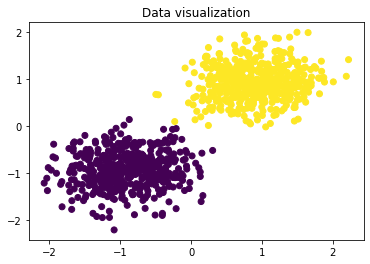

In [3]:
# Data normalization

# Perform data normalization here using mean substraction and std division
## Write your code here
avg = np.mean(data, axis=0)
std = np.std(data, axis=0)
data = (data-avg)/std

plt.figure()
plt.scatter(data[:,0],data[:,1],c=label)
plt.title('Data visualization')
plt.show()

<hr> 

### 1.3 Obtain PCA directions and variances

Steps:
1. After normalizing data, compute covariance matrix.
2. Use svd() on covariance matrix (m x n) to get U, S, VT. (U and VT are orthonormal sets of orders m x m and n x n respectively). S is a diagonal matrix with variances in each direction.
3. Transform the data using U, and check variances along the 2 PCA directions chosen.

variance along pca1 direction= 1.8477663843459724
variance along pca2 direction= 0.152233615654027


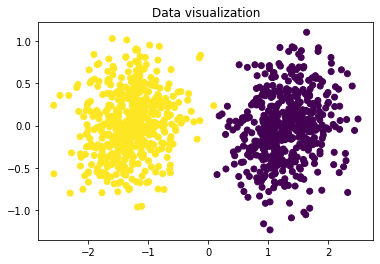

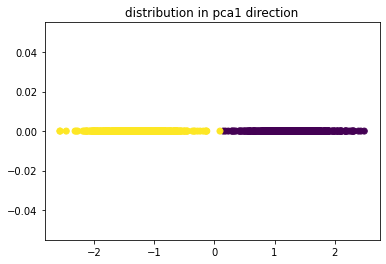

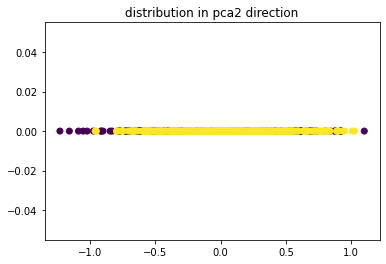

In [4]:
# PCA

# covariance matrix
cov=data.T @ data

# using singular value decomposition
u,s,vh=np.linalg.svd(cov)

trans_data= data @ u ## Write your code here

var_pca1=np.var(trans_data[:,0])
var_pca2=np.var(trans_data[:,1])

print('variance along pca1 direction=',var_pca1)
print('variance along pca2 direction=',var_pca2)


plt.figure()
plt.scatter(trans_data[:,0],trans_data[:,1],c=label)
plt.title('Data visualization')
plt.show()

plt.figure()
plt.scatter(trans_data[:,0],np.zeros(data.shape[0]),c=label)
plt.title('distribution in pca1 direction')
plt.show()

plt.figure()
plt.scatter(trans_data[:,1],np.zeros(data.shape[0]),c=label)
plt.title('distribution in pca2 direction')
plt.show()

In [5]:
class pca:
  # Constructor
  def __init__(self, name='reg',data=None,retain_dim=None):
    self.name = name  # Create an instance variable
    self.data = data
    self.retain_dim = retain_dim if retain_dim is not None else self.ret_dim(self.data)

  # compute pca transform value
  def pca_comp(self,data):
    data = self.pre_process(data)
    cov = data.T @ data ## Write your code here
    u, _, _ = np.linalg.svd(cov) # singular value decomposition
    u_req = u[:,:self.retain_dim] ## Write your code here
    trans_data = data @ u_req ## Write your code here
    return trans_data,u_req
    
  # compute the required retain dimension
  def ret_dim(self,data):
    data = self.pre_process(data)
    cov = data.T @ data
    _, s, _ = np.linalg.svd(cov)
    ind = (np.where((np.cumsum(s)/np.sum(s))>0.9))[0][0] ## Write your code here
    return ind+1
    
  def pre_process(self,data):
    data1=(data-np.mean(data,axis=0))
    data=data1/(np.std(data1,axis=0)+10**(-30)) # avoid divide by zero
    return data

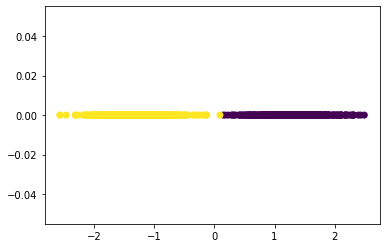

In [6]:
# pca transformation
PCA=pca(data=data)
trans_data,trans_mat=PCA.pca_comp(data)
plt.scatter(trans_data,np.zeros(trans_data.shape),c=label)

<hr> 

### 1.4 Conduct Classification using PCA with K-NN

In [7]:
# classification using pca
# use k-nearest neighbour classifier after dimensionality reduction

from sklearn.neighbors import KNeighborsClassifier
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(trans_data, label)

print('KNN Training accuracy =',knn.score(trans_data,label)*100)




KNN Training accuracy = 99.9


In [8]:
knn2 = KNeighborsClassifier(n_neighbors=k)
knn2.fit(data, label)

print('KNN Training accuracy without pca =',knn2.score(data,label)*100)

KNN Training accuracy without pca = 99.9


In [9]:
# test data
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,50)
data2=np.random.multivariate_normal(mean2,var,50)
data=np.concatenate((data1,data2))
tst_label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))

print('KNN Testing accuracy =',knn.score(PCA.pre_process(data) @ trans_mat,tst_label)*100)

KNN Testing accuracy = 100.0


In [10]:
knn2 = KNeighborsClassifier(n_neighbors=k)
knn2.fit(data, tst_label)

print('KNN Testing accuracy without pca =',knn2.score(data,tst_label)*100)

KNN Testing accuracy without pca = 100.0


<hr> 

### 1.5 Apply PCA on MNIST Digit dataset

In [11]:
%pip install idx2numpy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\bsidd\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


(50, 28, 28)
(100, 784)
(100,)


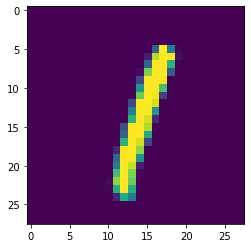

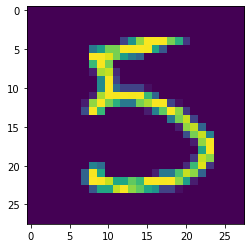

In [12]:
# MNIST data

file1='t10k-images-idx3-ubyte' ## Change the path accordingly
file2='t10k-labels-idx1-ubyte' ## Change the path accordingly

import idx2numpy

Images= idx2numpy.convert_from_file(file1)
labels= idx2numpy.convert_from_file(file2)

cl=[1,5]

# for class 1

id_1=np.where(labels==cl[0])
id1=id_1[0]
id1=id1[:50]
Im_1=Images[id1,:,:]
lab_1=labels[id1]

# for class 5
id_5=np.where(labels==cl[1])
id5=id_5[0]
id5=id5[:50]
Im_5=Images[id5,:,:]
lab_5=labels[id5]

plt.imshow(Im_1[1,:,:])
plt.figure()
plt.imshow(Im_5[1,:,:])

print(Im_5.shape)

data=np.concatenate((Im_1,Im_5))
data=np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2]))
print(data.shape)
G_lab=np.concatenate((lab_1,lab_5))
print(G_lab.shape)

data = data.astype('float32')

data /= 255



In [13]:
print('Initial data dimension = ',data.shape[1])
PCA=pca(data=data)

trans_data,trans_mat=PCA.pca_comp(data)
print('No. of retained dimensions after PCA = ',trans_mat.shape[1])
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(trans_data, G_lab)

print('KNN Training accuracy =',knn.score(trans_data,G_lab)*100)


## testing
## data preparation
id_1=np.where(labels==cl[0])
id1=id_1[0]
id1=id1[100:150]
Im_1=Images[id1,:,:]
lab_1=labels[id1]

# for class 5
id_5=np.where(labels==cl[1])
id5=id_5[0]
id5=id5[100:150]
Im_5=Images[id5,:,:]
lab_5=labels[id5]

# plt.imshow(Im_1[1,:,:])
# plt.figure()
# plt.imshow(Im_5[1,:,:])

print(Im_5.shape)

data_tst=np.concatenate((Im_1,Im_5))
data_tst=np.reshape(data_tst,(data_tst.shape[0],data_tst.shape[1]*data_tst.shape[2]))

tst_lab=np.concatenate((lab_1,lab_5))


# final testing
print('KNN Testing accuracy =',knn.score(PCA.pre_process(data_tst) @ trans_mat,tst_lab)*100)


Initial data dimension =  784
No. of retained dimensions after PCA =  34
KNN Training accuracy = 96.0
(50, 28, 28)
KNN Testing accuracy = 98.0


<hr> 

### 1.6 Perform PCA on MNIST and Classify taking the data with any 3 Classes

(50, 28, 28)
(150, 784)
(150,)


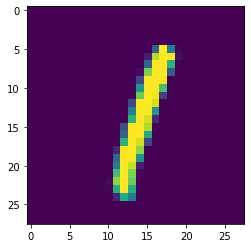

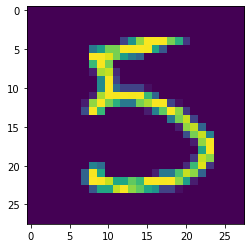

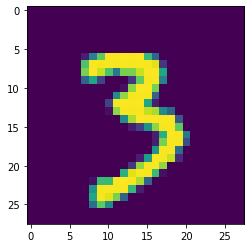

In [14]:
## Write your code here
file1='t10k-images-idx3-ubyte' ## Change the path accordingly
file2='t10k-labels-idx1-ubyte' ## Change the path accordingly

import idx2numpy

Images= idx2numpy.convert_from_file(file1)
labels= idx2numpy.convert_from_file(file2)

cl=[1,5,3]

# for class 1
id_1=np.where(labels==cl[0])
id1=id_1[0]
id1=id1[:50]
Im_1=Images[id1,:,:]
lab_1=labels[id1]

# for class 5
id_5=np.where(labels==cl[1])
id5=id_5[0]
id5=id5[:50]
Im_5=Images[id5,:,:]
lab_5=labels[id5]

# for class 3
id_3=np.where(labels==cl[2])
id3=id_3[0]
id3=id3[:50]
Im_3=Images[id3,:,:]
lab_3=labels[id3]

plt.imshow(Im_1[1,:,:])
plt.figure()
plt.imshow(Im_5[1,:,:])
plt.figure()
plt.imshow(Im_3[1,:,:])

print(Im_5.shape)

data=np.concatenate((Im_1,Im_5,Im_3))
data=np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2]))
print(data.shape)
G_lab=np.concatenate((lab_1,lab_5,lab_3))
print(G_lab.shape)

data = data.astype('float32')

data /= 255

In [15]:
print('Initial data dimension=',data.shape[1])
PCA=pca(data=data)

trans_data,trans_mat=PCA.pca_comp(data)
print('Retained dimesion after PCA=',trans_mat.shape[1])
k=7
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(trans_data, G_lab)

knn2 = KNeighborsClassifier(n_neighbors=k)
knn2.fit(data, G_lab)

print('KNN Training accuracy =',knn.score(trans_data,G_lab)*100)
print('KNN Training accuracy without PCA =',knn2.score(data,G_lab)*100)


## testing
## data preparation
id_1=np.where(labels==cl[0])
id1=id_1[0]
id1=id1[100:150]
Im_1=Images[id1,:,:]
lab_1=labels[id1]

# for class 5
id_5=np.where(labels==cl[1])
id5=id_5[0]
id5=id5[100:150]
Im_5=Images[id5,:,:]
lab_5=labels[id5]

# for class 5
id_3=np.where(labels==cl[2])
id3=id_3[0]
id3=id3[100:150]
Im_3=Images[id3,:,:]
lab_3=labels[id3]

# plt.imshow(Im_1[1,:,:])
# plt.figure()
# plt.imshow(Im_5[1,:,:])

print(Im_5.shape)

data_tst=np.concatenate((Im_1,Im_5,Im_3))
data_tst=np.reshape(data_tst,(data_tst.shape[0],data_tst.shape[1]*data_tst.shape[2]))
tst_lab=np.concatenate((lab_1,lab_5,lab_3))


# final testing
print('KNN Testing accuracy =',knn.score(PCA.pre_process(data_tst) @ trans_mat,tst_lab)*100)
print('KNN Testing accuracy without PCA =',knn2.score(data_tst,tst_lab)*100)

Initial data dimension= 784
Retained dimesion after PCA= 50
KNN Training accuracy = 90.66666666666666
KNN Training accuracy without PCA = 90.66666666666666
(50, 28, 28)
KNN Testing accuracy = 86.0
KNN Testing accuracy without PCA = 80.0


<hr>

## Task 2: LDA

### 2.1 Data Generation

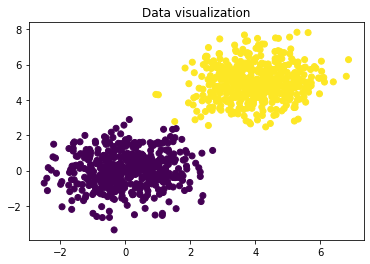

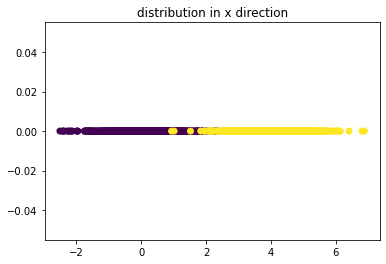

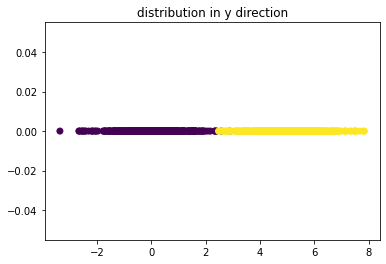

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# data generation

mean1=np.array([0,0])
mean2=np.array([4,5])
var=np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,500)
data2=np.random.multivariate_normal(mean2,var,500)
data=np.concatenate((data1,data2))
label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))

plt.figure()
plt.scatter(data[:,0],data[:,1],c=label)
plt.title('Data visualization')
plt.show()

plt.figure()
plt.scatter(data[:,0],np.zeros(data.shape[0]),c=label)
plt.title('distribution in x direction')
plt.show()

plt.figure()
plt.scatter(data[:,1],np.zeros(data.shape[0]),c=label)
plt.title('distribution in y direction')
plt.show()


<hr>

### 2.2 Perform 2-class and m-class LDA

For 2-class:
$$ J = \frac{|\mu_{1} - \mu_{2}|}{s_{1}^2 + s_{2}^2} = \frac{v^{T}s_{b}v}{v^{T}s_{w}v}$$

We implement dJ/dv = 0 for maxima
$$ \frac{dJ}{dv} = s_{b}v - \frac{v^{T}s_{b}v(s_{w}v)}{v^{T}s_{w}v} = s_{b}v - \lambda s_{w}v = 0 $$

So, 
$$ s_{w}^{-1}s_{b}v = \lambda v $$

For m-class, get distance of all means from the overall mean of data as $d_{1}, d_{2}, ... , d_{m}$. Then:
$$ J = \frac{d_{1}^2 + d_{2}^{2} + ... + d_{m}^2}{s_{1}^2 + s_{2}^2 + ... + s_{m}^2}$$


In [17]:
# perform 2-class and m-class LDA
def LDA(data,label):  
  id={}
  data_l={}
  mean_l={}
  cov_l={}
  S_w=np.zeros((data.shape[1],data.shape[1]))


  cls=np.unique(label)
  for i in cls:
    id[i]=np.where(label==i)[0]
    data_l[i]=data[id[i],:]
    mean_l[i]=np.mean(data_l[i],axis=0)
    cov_l[i]= ((data_l[i]-mean_l[i]).T @ (data_l[i]-mean_l[i]))/(data_l[i].shape[0]-1) ## Scatter matrix for each class
    S_w=S_w+cov_l[i] # sum of scatters of all classes (var within class: want min)
    
  S_w=S_w/len(data_l)

  if len(data_l)==2:
    S_b= (mean_l[1]-mean_l[0]).T ## Scatter between the classes (diff between the 2 means)
    print(mean_l)
    w= np.linalg.pinv(S_w) @ S_b ## Write your code here

  else:
    S_t=np.cov(data,rowvar=False) # covariance of all data
    S_b= S_t - S_w ## Write your code here
    u,_,_= np.linalg.svd(np.linalg.pinv(S_w) @ S_b) ## Write your code here
    w=u[:,:len(data_l)-1]

  return w

{0.0: array([0.0653461 , 0.03160688]), 1.0: array([3.98018096, 4.98734688])}
Dim of reduced data =  1


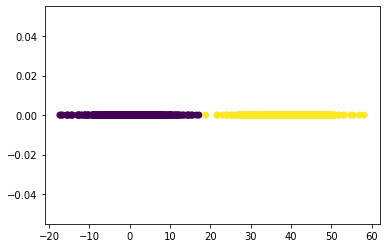

In [18]:
# after LDA projection

w=LDA(data,label)
w = np.reshape(w,(w.shape[0],1))
plt.figure()
plt.scatter(data @ w,np.zeros(data.shape[0]),c=label)
print("Dim of reduced data = ", w.shape[1]) # reducing it to number of classes



<hr>

### 2.3 Perform classification using LDA with K-NN

In [19]:
# Classification using LDA
# Use k-nearest neighbour classifier (Scikit Learn) after dimensionality reduction

## Write your code here
from sklearn.neighbors import KNeighborsClassifier

LDA_data = data @ w
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(LDA_data, label)

print('KNN Training accuracy =', knn.score(LDA_data,label)*100)

# test data
np.random.seed(0)
data1 = np.random.multivariate_normal(mean1, var, 50)
data2 = np.random.multivariate_normal(mean2, var, 50)
data = np.concatenate((data1,data2))
tst_label = np.concatenate((np.zeros(data1.shape[0]), np.ones(data2.shape[0])))

print('KNN Testing accuracy =', knn.score(data@w, tst_label)*100)


KNN Training accuracy = 100.0
KNN Testing accuracy = 100.0


<hr>

### 2.4 LDA Multiclass

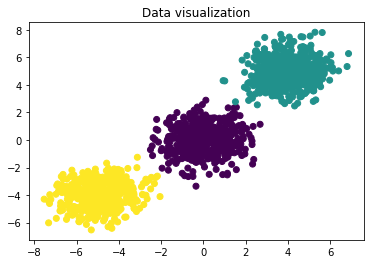

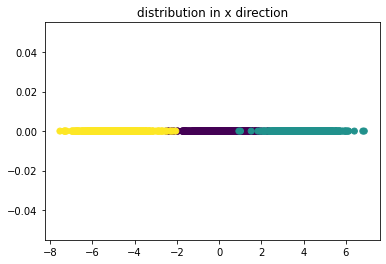

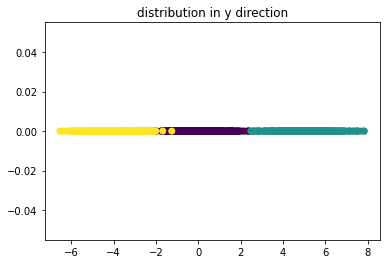

In [20]:
mean1=np.array([0,0])
mean2=np.array([4,5])
mean3=np.array([-5,-4])
var=np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,500)
data2=np.random.multivariate_normal(mean2,var,500)
data3=np.random.multivariate_normal(mean3,var,500)
data=np.concatenate((data1,data2,data3))
label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0]),np.ones(data3.shape[0])+1))

plt.figure()
plt.scatter(data[:,0],data[:,1],c=label)
plt.title('Data visualization')
plt.show()

plt.figure()
plt.scatter(data[:,0],np.zeros(data.shape[0]),c=label)
plt.title('distribution in x direction')
plt.show()

plt.figure()
plt.scatter(data[:,1],np.zeros(data.shape[0]),c=label)
plt.title('distribution in y direction')
plt.show()



(2, 2)


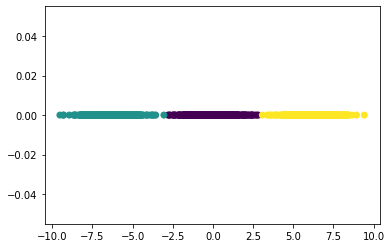

In [21]:
# after projection
w=LDA(data,label)
print(w.shape)
plt.figure()
plt.scatter(data @ w[:,0],np.zeros(data.shape[0]),c=label) # by performing 1D projection

<hr>

### 2.5 Testing with K-NN

In [22]:
# Testing (using KNN)
# Use k-nearest neighbour classifier (Scikit Learn) after dimensionality reduction

## Write your code here
from sklearn.neighbors import KNeighborsClassifier

LDA_data = data @ w
k = 5
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(LDA_data, label)

print('KNN Training accuracy =',knn.score(LDA_data,label)*100)

# test data
np.random.seed(0)
data1 = np.random.multivariate_normal(mean1,var,50)
data2 = np.random.multivariate_normal(mean2,var,50)
data3 = np.random.multivariate_normal(mean3,var,50)
data_tst = np.concatenate((data1,data2,data3))
tst_label = np.concatenate((np.zeros(data1.shape[0]), np.ones(data2.shape[0]), np.ones(data2.shape[0])+1))

print('KNN Testing accuracy =', knn.score(data_tst@w,tst_label)*100)

KNN Training accuracy = 99.93333333333332
KNN Testing accuracy = 100.0


<hr>

### 2.6 Perform LDA on MNIST and Classify using the data of any 3 classes

(50, 28, 28)
(150, 784)
(150,)


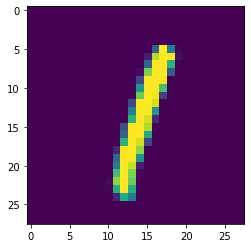

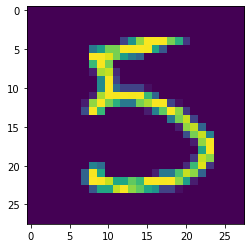

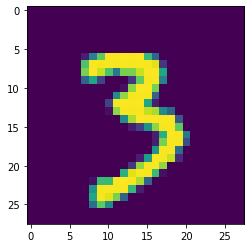

In [23]:
## Write your code here
file1='t10k-images-idx3-ubyte' ## Change the path accordingly
file2='t10k-labels-idx1-ubyte' ## Change the path accordingly

import idx2numpy

Images= idx2numpy.convert_from_file(file1)
labels= idx2numpy.convert_from_file(file2)

cl=[1,5,3]

# for class 1
id_1=np.where(labels==cl[0])
id1=id_1[0]
id1=id1[:50]
Im_1=Images[id1,:,:]
lab_1=labels[id1]

# for class 5
id_5=np.where(labels==cl[1])
id5=id_5[0]
id5=id5[:50]
Im_5=Images[id5,:,:]
lab_5=labels[id5]

# for class 3
id_3=np.where(labels==cl[2])
id3=id_3[0]
id3=id3[:50]
Im_3=Images[id3,:,:]
lab_3=labels[id3]

plt.imshow(Im_1[1,:,:])
plt.figure()
plt.imshow(Im_5[1,:,:])
plt.figure()
plt.imshow(Im_3[1,:,:])

print(Im_5.shape)

data=np.concatenate((Im_1,Im_5,Im_3))
data=np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2]))
print(data.shape)
label=np.concatenate((lab_1,lab_5,lab_3))
print(G_lab.shape)

data = data.astype('float32')

data /= 255

In [24]:
w = LDA(data,label)

from sklearn.neighbors import KNeighborsClassifier

LDA_data = data @ w
k = 5
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(LDA_data, label)

print('KNN Training accuracy =', knn.score(LDA_data,label)*100)
print("Initial dimensions = ", data.shape[1])
print("Number of retained dimensions = ", w.shape[1]) # reducing it to number of classes-1


KNN Training accuracy = 100.0
Initial dimensions =  784
Number of retained dimensions =  2


In [25]:
## testing
## data preparation
id_1=np.where(labels==cl[0])
id1=id_1[0]
id1=id1[100:150]
Im_1=Images[id1,:,:]
lab_1=labels[id1]

# for class 5
id_5=np.where(labels==cl[1])
id5=id_5[0]
id5=id5[100:150]
Im_5=Images[id5,:,:]
lab_5=labels[id5]

# for class 5
id_3=np.where(labels==cl[2])
id3=id_3[0]
id3=id3[100:150]
Im_3=Images[id3,:,:]
lab_3=labels[id3]

# plt.imshow(Im_1[1,:,:])
# plt.figure()
# plt.imshow(Im_5[1,:,:])

print(Im_5.shape)

data_tst=np.concatenate((Im_1,Im_5,Im_3))
data_tst=np.reshape(data_tst,(data_tst.shape[0],data_tst.shape[1]*data_tst.shape[2]))

tst_label=np.concatenate((lab_1,lab_5,lab_3))


# final testing
print('KNN Testing accuracy =', knn.score(data_tst@w,tst_label)*100)
print("Initial dimensions = ", data.shape[1])

(50, 28, 28)
KNN Testing accuracy = 50.66666666666667
Initial dimensions =  784


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=0)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

print('KNN Training accuracy =',knn.score(X_train, y_train)*100)
y_pred = knn.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Testing Accuracy = ' + str(accuracy_score(y_test, y_pred)*100))

KNN Training accuracy = 89.16666666666667
[[11  0  0]
 [ 1  0  5]
 [ 2  7  4]]
Testing Accuracy = 50.0
